In [233]:
import numpy as np
import string 
from collections import Counter
from sklearn import svm 
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools


In [2]:
""" Importing Yelp Training Set """
train_yelp_label = []
train_yelp_par = []
with open('yelp-train.txt') as file:
    lines = file.readlines()
    for l in lines:
        lread = l.split('.\n')
        lread = [''.join(c for c in s if c not in string.punctuation) for s in lread ]
        train_yelp_par.append(np.array(lread[0][:-3])) 
        train_yelp_label.append(np.array(lread[0][-2]))
train_yelp_par = np.char.lower( train_yelp_par)  
train_yelp_par = np.reshape(train_yelp_par,(7000,1))
train_yelp_label = np.reshape(train_yelp_label,(7000,1))
train_yelp = np.hstack ((train_yelp_par,train_yelp_label))

In [3]:
""" Importing Yelp validation Set """
valid_yelp_label = []
valid_yelp_par = []
with open('yelp-valid.txt') as file:
    lines = file.readlines()
    for l in lines:
        lread = l.split('.\n')
        lread = [''.join(c for c in s if c not in string.punctuation) for s in lread ]
        valid_yelp_par.append(np.array(lread[0][:-3])) 
        valid_yelp_label.append(np.array(lread[0][-2]))
valid_yelp_par = np.char.lower( valid_yelp_par)
valid_yelp_label= np.array(valid_yelp_label)
valid_yelp_par = np.reshape(valid_yelp_par,(1000,1))
valid_yelp_label = np.reshape(valid_yelp_label,(1000,1))
valid_yelp = np.hstack ((valid_yelp_par,valid_yelp_label))

In [4]:
""" Importing Yelp test Set """
test_yelp_label = []
test_yelp_par = []
with open('yelp-test.txt') as file:
    lines = file.readlines()
    for l in lines:
        lread = l.split('.\n')
        lread = [''.join(c for c in s if c not in string.punctuation) for s in lread ]
        test_yelp_par.append(np.array(lread[0][:-3])) 
        test_yelp_label.append(np.array(lread[0][-2]))
test_yelp_par = np.char.lower( test_yelp_par) 
test_yelp_label= np.array(test_yelp_label)
test_yelp_par = np.reshape(test_yelp_par,(2000,1))
test_yelp_label = np.reshape(test_yelp_label,(2000,1))
test_yelp = np.hstack ((test_yelp_par,test_yelp_label))

In [5]:
def CountFrequency(x):
    x = x.squeeze()
    l = []
    for i in range(len(x)):
        l.append(x[i])
    l = ''.join(l)
    l = l.replace('  ', '')
    l = l.split(' ')
    l = [i for i in l if not i.isdigit()]
    return Counter(l)

In [6]:
""" Counting Words in Training Set of Yelp Dataset """

train_yelp_vocab = CountFrequency(train_yelp_par)
yelp_FeatureSet = train_yelp_vocab.most_common(10000)
yelp_Feature = []
yelp_FeatureValue = []
for i in range(len(yelp_FeatureSet)):
    yelp_Feature.append(yelp_FeatureSet[i][0])
    yelp_FeatureValue.append(yelp_FeatureSet[i][1])

In [7]:
Vocab = []
index = []
Vocab = np.chararray((10000,3))
for i in range(len(Vocab)):
    index.append(i+1)
Vocab = np.vstack((yelp_Feature, index))
Vocab = Vocab.T
Vocab = np.insert(Vocab, 2, yelp_FeatureValue , axis=1)

In [8]:
with open('./dataset/yelp-vocab.txt', 'w',encoding="utf8") as f:
    for line in Vocab:
        f.write(line[0]+' '+line[1]+' '+line[2]+'\n')

In [9]:
dictionary = {}
for word in Vocab:
    dictionary[word[0]] = word[1]

In [10]:
train = []
for i in range(len(train_yelp)):
    sentence = []
    words = train_yelp[i][0].split()
    for j in range(len(words)):
        if words[j] in dictionary:
            sentence.append(dictionary[words[j]])
    sentence = ' '.join(sentence)
    train.append([sentence,train_yelp[i][1]])

In [11]:
with open('./dataset/yelp-train.txt', 'w',encoding="utf8") as f:
    for line in train:
        f.write(line[0]+' '+line[1]+'\n')

In [12]:
validation = []
for i in range(len(valid_yelp)):
    sentence = []
    words = valid_yelp[i][0].split()
    for j in range(len(words)):
        if words[j] in dictionary:
            sentence.append(dictionary[words[j]])
    sentence = ' '.join(sentence)
    validation.append([sentence,valid_yelp[i][1]])

In [13]:
with open('./dataset/yelp-valid.txt', 'w',encoding="utf8") as f:
    for line in validation:
        f.write(line[0]+' '+line[1]+'\n')

In [14]:
test = []
for i in range(len(test_yelp)):
    sentence = []
    words = test_yelp[i][0].split()
    for j in range(len(words)):
        if words[j] in dictionary:
            sentence.append(dictionary[words[j]])
    sentence = ' '.join(sentence)
    test.append([sentence,test_yelp[i][1]])

In [15]:
with open('./dataset/yelp-test.txt', 'w',encoding="utf8") as f:
    for line in test:
        f.write(line[0]+' '+line[1]+'\n')

# Random Classifier

In [16]:
""" Random Classifier """
random_label = np.zeros([2000])
np.random.seed(1)
for i in range(len(test_yelp_label)):
    random_label[i] = np.random.randint(1, 6) 
    
test_labels = np.array(test_yelp_label, dtype= float)

counter = 0
for i in range(len(test_labels)):
    if test_labels[i] == random_label[i]:
        counter = counter + 1
# print(counter)

performance_randomClassifier = (counter/len(test_labels))*100
print("Accuracy of Random Classifier: ",performance_randomClassifier)


""" Calculate F1-Measure """

F1_measure = f1_score(test_labels, random_label, average='macro')*100

print("F1-Measure for Random Classifier:", F1_measure)

Accuracy of Random Classifier:  19.15
F1-Measure for Random Classifier: 17.6258880708


# Majority-Class Classifier 

In [17]:
""" Majarity-Class Classifier """
train_label_majority = Counter(train_yelp_label.squeeze())
train_label_majority = train_label_majority.most_common(1)
majority = np.zeros([2000])
for i in range(len(test_labels)):
    majority[i] = train_label_majority[0][0]


count = 0
test_labels = np.array(test_labels, dtype= int)
majority = np.array(majority, dtype= int)

for i in range(len(test_labels)):
    if test_labels[i] == majority[i]:
        count = count + 1

performance_majorityClassifier = (count/len(test_labels))*100
print("Accuracy of Majority-Class Classifier: ",performance_majorityClassifier)

""" Calculate F1-Measure """

F1_measure = f1_score(test_labels, majority, average='macro')*100

print("F1-Measure for Majority-Class Classifier:", F1_measure)


Accuracy of Majority-Class Classifier:  35.099999999999994
F1-Measure for Majority-Class Classifier: 10.3923019985


C:\Users\niloo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Binary Bag-of-word

In [18]:
yelp_TrainBinaryBag = np.zeros([7000,10000])
    
for i in range(len(train_yelp_par)):
    sentence = np.apply_along_axis(lambda a: (a[0].split(' ')),0,train_yelp_par[i])
    for j in range(len(yelp_Feature)):
        if yelp_Feature[j] in sentence:
            yelp_TrainBinaryBag[i][j] = 1

In [19]:
yelp_ValidBinaryBag = np.zeros([1000,10000])
   
for i in range(len(valid_yelp_par)):
    sentence = np.apply_along_axis(lambda a: (a[0].split(' ')),0,valid_yelp_par[i])
    for j in range(len(yelp_Feature)):
        if yelp_Feature[j] in sentence:
            yelp_ValidBinaryBag[i][j] = 1

In [20]:
yelp_TestBinaryBag = np.zeros([2000,10000])
    
for i in range(len(test_yelp_par)):
    sentence = np.apply_along_axis(lambda a: (a[0].split(' ')),0,test_yelp_par[i])
    for j in range(len(yelp_Feature)):
        if yelp_Feature[j] in sentence:
            yelp_TestBinaryBag[i][j] = 1            

# Naive Bayes Hyperparameter Tuning

Validation F1-Measure: 31.67311441 		alpha: 1e-05
Validation F1-Measure: 32.296559425 		alpha: 1.12332403298e-05
Validation F1-Measure: 32.296559425 		alpha: 1.26185688307e-05
Validation F1-Measure: 32.2758362219 		alpha: 1.41747416293e-05
Validation F1-Measure: 32.5062577791 		alpha: 1.59228279334e-05
Validation F1-Measure: 32.7918430972 		alpha: 1.78864952906e-05
Validation F1-Measure: 32.7918430972 		alpha: 2.00923300257e-05
Validation F1-Measure: 32.7934190507 		alpha: 2.25701971963e-05
Validation F1-Measure: 32.7710841765 		alpha: 2.53536449397e-05
Validation F1-Measure: 32.8321899353 		alpha: 2.84803586844e-05
Validation F1-Measure: 32.8321899353 		alpha: 3.1992671378e-05
Validation F1-Measure: 33.3145883052 		alpha: 3.5938136638e-05
Validation F1-Measure: 33.3145883052 		alpha: 4.0370172586e-05
Validation F1-Measure: 33.4569294309 		alpha: 4.53487850813e-05
Validation F1-Measure: 33.5539855155 		alpha: 5.09413801482e-05
Validation F1-Measure: 33.5010678695 		alpha: 5.72236765935

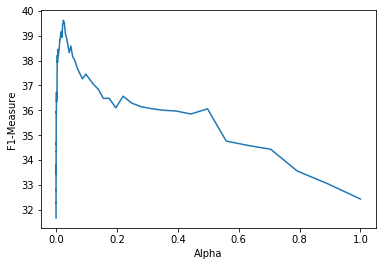

In [97]:
""" Naive Bayes """
x_NB_train = yelp_TrainBinaryBag
y_NB_train = np.ravel(train_yelp_label)
x_NB_valid = yelp_ValidBinaryBag
y_NB_valid = np.ravel(valid_yelp_label)
x_NB_test = yelp_TestBinaryBag
y_NB_test = np.ravel(test_yelp_label)

"""Hyper Parameter Tuning on Validation Set"""
F1_measure_NB = []
alpha_list_NB = []
for alpha in np.logspace(-5,0,100):
    mnb = BernoulliNB(alpha =alpha)
    mnb.fit(x_NB_train,y_NB_train)
    result_valid= mnb.predict(x_NB_valid)
    F1_measure_valid = f1_score(valid_yelp_label ,result_valid ,average='macro')*100
    F1_measure_NB = np.append(F1_measure_NB, F1_measure_valid)
    alpha_list_NB = np.append(alpha_list_NB, alpha)
    print("Validation F1-Measure:", F1_measure_valid,'\t\t'"alpha:", alpha)

bestalpha = alpha_list_NB[np.argmax(F1_measure_NB)]
print('\n''Best Alpha is', bestalpha,'and F1-Measure for validation set corresponding to best Alpha is', max(F1_measure_NB))

""" Plotting """
a = F1_measure_NB.squeeze()
b = alpha_list_NB.squeeze()
plt.plot(b , a)
plt.ylabel('F1-Measure')
plt.xlabel('Alpha')
plt.show()

# Naive Bayes Classifier

In [242]:
""" Training Naive Bayse Classifier """
""" Naive Bayes for Training Set """
mnb = BernoulliNB(alpha =0.0242012826479)
mnb.fit(x_NB_train,y_NB_train)
result_train= mnb.predict(x_NB_train)

accuracy_train = accuracy_score(result_train,y_NB_train)*100
print("Naive Bayse Classifier Accuracy for Train Set:",accuracy_train)
F1_measure_train = f1_score(train_yelp_label ,result_train ,average='macro')*100
print("F1-Measure for NB Classifier on Train Set:", F1_measure_train)


""" Naive Bayes for Validation Set """
result_valid= mnb.predict(x_NB_valid)

accuracy_valid = accuracy_score(result_valid,y_NB_valid)*100
print("Naive Bayse Classifier Accuracy for Validation Set:",accuracy_valid)
F1_measure_valid = f1_score(valid_yelp_label, result_valid, average='macro')*100
print("F1-Measure for NB Classifier on Validation Set:", F1_measure_valid)


# y_NB_valid = valid_yelp_label
# from sklearn.metrics import confusion_matrix
# confusion_matrix(y_NB_valid, result)


""" Naive Bayes for Test Set """
result_test= mnb.predict(x_NB_test)

accuracy_test = accuracy_score(result_test,y_NB_test)*100
print("Naive Bayse Classifier Accuracy for Test Set:",accuracy_test)
F1_measure_test = f1_score(test_yelp_label, result_test, average='macro')*100
print("F1-Measure for NB Classifier on Test set:", F1_measure_test)


Naive Bayse Classifier Accuracy for Train Set: 73.1
F1-Measure for NB Classifier on Train Set: 75.2477489836
Naive Bayse Classifier Accuracy for Validation Set: 43.1
F1-Measure for NB Classifier on Validation Set: 39.6208391848
Naive Bayse Classifier Accuracy for Test Set: 43.8
F1-Measure for NB Classifier on Test set: 38.1927412339


In [183]:
 confusion_matrix(test_yelp_label, result_test)

array([[ 51,  28,  18,   9,  37],
       [ 22,  44,  43,  30,  51],
       [  8,  36,  61,  93, 102],
       [  8,  25,  53, 307, 309],
       [  8,  14,  28, 202, 413]], dtype=int64)

Confusion matrix, without normalization
[[ 51  28  18   9  37]
 [ 22  44  43  30  51]
 [  8  36  61  93 102]
 [  8  25  53 307 309]
 [  8  14  28 202 413]]
Normalized confusion matrix
[[ 0.36  0.2   0.13  0.06  0.26]
 [ 0.12  0.23  0.23  0.16  0.27]
 [ 0.03  0.12  0.2   0.31  0.34]
 [ 0.01  0.04  0.08  0.44  0.44]
 [ 0.01  0.02  0.04  0.3   0.62]]


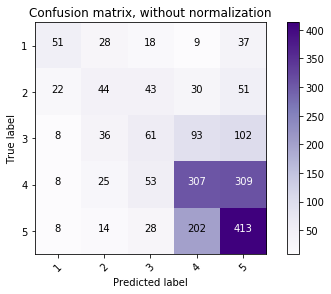

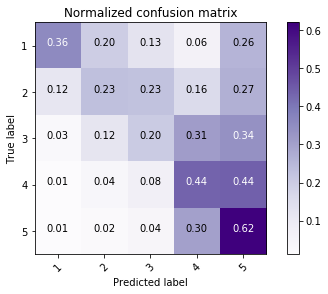

In [243]:
class_names = ['1', '2','3','4','5']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Purples):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_yelp_label, result_test)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# Support Vector Machine Hyperparameter Tuning

In [100]:
# parameters = {'C': np.logspace(-3,1, 200)}
# svm=GridSearchCV(LinearSVC(), parameters).fit(x_SVM_train, y_SVM_train)
# prediction_valid = svm.predict(x_SVM_valid)
# F1_measure_valid = f1_score(valid_yelp_label, prediction_valid, average='macro')*100
# print("F1-Measure for SVM Classifier on Validation set:", F1_measure_valid)
# print("Model best estimator:",svm.best_estimator_ )
# print("Model best score:", svm.best_score_ )
# print("Model best parameter:", svm.best_params_ )

In [102]:
# """ Hyper Parameter Tuning on Validation Set """
# for c in np.logspace(0, 2, 50):
#     clf_SVM = LinearSVC(penalty='l2', loss='hinge',C= c )
#     clf_SVM.fit(x_SVM_train, y_SVM_train)
#     prediction_valid = clf_SVM.predict(x_SVM_valid)
#     F1_measure_valid = f1_score(valid_yelp_label, prediction_valid, average='macro')*100
#     print("Validation F1-Measure:", F1_measure_valid,"\t" "C:", c)

Validation F1-Measure: 40.0828085723 		C: 0.001
Validation F1-Measure: 40.7294531931 		C: 0.00104737089796
Validation F1-Measure: 40.7823602501 		C: 0.00109698579789
Validation F1-Measure: 41.142420233 		C: 0.00114895100019
Validation F1-Measure: 41.6302132904 		C: 0.00120337784078
Validation F1-Measure: 41.4303452344 		C: 0.00126038292968
Validation F1-Measure: 41.2991089177 		C: 0.00132008840083
Validation F1-Measure: 41.4753616317 		C: 0.00138262217376
Validation F1-Measure: 41.5223730473 		C: 0.00144811822767
Validation F1-Measure: 42.5330036815 		C: 0.00151671688847
Validation F1-Measure: 42.5035830527 		C: 0.00158856512943
Validation F1-Measure: 42.3926887418 		C: 0.00166381688608
Validation F1-Measure: 42.9375928685 		C: 0.00174263338601
Validation F1-Measure: 42.6160865419 		C: 0.00182518349432
Validation F1-Measure: 42.3218253478 		C: 0.00191164407539
Validation F1-Measure: 42.3748957932 		C: 0.00200220037182
Validation F1-Measure: 42.5083717284 		C: 0.00209704640132
Validatio

Validation F1-Measure: 42.4427553556 		C: 0.71494289866
Validation F1-Measure: 42.0354007381 		C: 0.748810385759
Validation F1-Measure: 42.0256171955 		C: 0.784282206134
Validation F1-Measure: 42.2273895797 		C: 0.821434358492
Validation F1-Measure: 42.2273895797 		C: 0.860346441668
Validation F1-Measure: 42.2260979315 		C: 0.901101825167
Validation F1-Measure: 42.2336419548 		C: 0.943787827778
Validation F1-Measure: 42.2843970345 		C: 0.988495904663
Validation F1-Measure: 42.4300456714 		C: 1.0353218433
Validation F1-Measure: 42.2917630412 		C: 1.08436596869
Validation F1-Measure: 42.0931795328 		C: 1.13573335834
Validation F1-Measure: 42.0196826941 		C: 1.18953406737
Validation F1-Measure: 42.0889032456 		C: 1.2458833643
Validation F1-Measure: 41.9418406206 		C: 1.30490197801
Validation F1-Measure: 41.8108885391 		C: 1.36671635646
Validation F1-Measure: 42.10900626 		C: 1.43145893752
Validation F1-Measure: 42.3690788566 		C: 1.49926843279
Validation F1-Measure: 42.3091167601 		C: 1.5

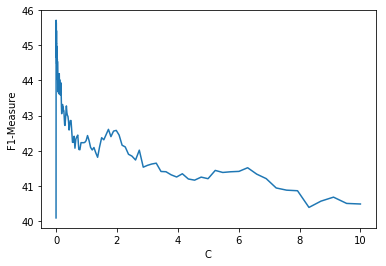

In [127]:
""" Support Vector Machine """
x_SVM_train = yelp_TrainBinaryBag
y_SVM_train = np.ravel(train_yelp_label)
x_SVM_valid = yelp_ValidBinaryBag
y_SVM_valid = np.ravel(valid_yelp_label)
x_SVM_test = yelp_TestBinaryBag
y_SVM_test = np.ravel(test_yelp_label)

""" Hyper Parameter Tuning on Validation Set """
F1_measure_SVM = []
c_list_SVM = []
for c in np.logspace(-3,1, 200):
    clf_SVM = LinearSVC(penalty='l2', loss='squared_hinge',C= c )
    clf_SVM.fit(x_SVM_train, y_SVM_train)
    prediction_valid = clf_SVM.predict(x_SVM_valid)
    F1_measure_valid = f1_score(valid_yelp_label, prediction_valid, average='macro')*100
    F1_measure_SVM = np.append(F1_measure_SVM, F1_measure_valid)
    c_list_SVM = np.append(c_list_SVM, c)
    print("Validation F1-Measure:", F1_measure_valid,"\t\t""C:", c)
    
best_c = c_list_SVM [np.argmax(F1_measure_SVM)]
print('\n''Best Penalty Parameter is', best_c,'and F1-Measure for validation set corresponding to best Penalty is', max(F1_measure_SVM))

    
""" Plotting """

a = F1_measure_SVM.squeeze()
b = c_list_SVM.squeeze()
plt.plot(b , a)
plt.xlabel('C')
plt.ylabel('F1-Measure')
# plt.legend(loc ='upper right')
plt.show()

# Support Vector Machine

In [253]:
""" SVM Classifier for Train Set """
clf_SVM = LinearSVC(penalty='l2', loss='squared_hinge', C=1.0)
clf_SVM.fit(x_SVM_train, y_SVM_train)
prediction_train = clf_SVM.predict(x_SVM_train)
accuracy = accuracy_score(prediction_train,y_SVM_train)*100
print("SVM Classifier Accuracy for Train Set:",accuracy)
F1_measure_train = f1_score(train_yelp_label, prediction_train, average='macro')*100
print("F1-Measure for SVM Classifier on Train set:", F1_measure_train)

""" SVM Classifier for Validation Set """
prediction_valid = clf_SVM.predict(x_SVM_valid)
accuracy = accuracy_score(prediction_valid,y_SVM_valid)*100
print("SVM Classifier Accuracy for Validation Set:",accuracy)
F1_measure_valid = f1_score(valid_yelp_label, prediction_valid, average='macro')*100
print("F1-Measure for SVM Classifier on Validation set:", F1_measure_valid)

""" SVM Classifier for Test Set """
prediction_test = clf_SVM.predict(x_SVM_test)
accuracy = accuracy_score(prediction_test,y_SVM_test)*100
print("SVM Classifier Accuracy for Test Set:",accuracy)
F1_measure_test = f1_score(test_yelp_label, prediction_test, average='macro')*100
print("F1-Measure for SVM Classifier on Test set:", F1_measure_test)

SVM Classifier Accuracy for Train Set: 99.6857142857
F1-Measure for SVM Classifier on Train set: 99.7645687722
SVM Classifier Accuracy for Validation Set: 45.1
F1-Measure for SVM Classifier on Validation set: 42.3068080013
SVM Classifier Accuracy for Test Set: 44.35
F1-Measure for SVM Classifier on Test set: 39.8483782628


Confusion matrix, without normalization
[[ 56  34  15  17  21]
 [ 33  55  45  37  20]
 [ 14  44  81 110  51]
 [ 12  31  88 332 239]
 [ 16  11  40 235 363]]
Normalized confusion matrix
[[ 0.39  0.24  0.1   0.12  0.15]
 [ 0.17  0.29  0.24  0.19  0.11]
 [ 0.05  0.15  0.27  0.37  0.17]
 [ 0.02  0.04  0.13  0.47  0.34]
 [ 0.02  0.02  0.06  0.35  0.55]]


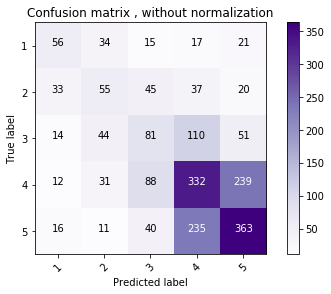

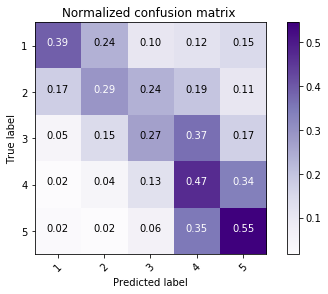

In [254]:
class_names = ['1', '2','3','4','5']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Purples):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_yelp_label, prediction_test)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix , without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix ')

plt.show()

# Decision Tree Hyperparameter Tuning

C:\Users\niloo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation F1-Measure: 18.61843344 		Depth: 1
Validation F1-Measure: 18.1935393455 		Depth: 2
Validation F1-Measure: 18.1969930896 		Depth: 3
Validation F1-Measure: 18.1403799889 		Depth: 4
Validation F1-Measure: 19.7325201709 		Depth: 5
Validation F1-Measure: 20.1892113555 		Depth: 6
Validation F1-Measure: 22.974674914 		Depth: 7
Validation F1-Measure: 27.7616523087 		Depth: 8
Validation F1-Measure: 28.2610982255 		Depth: 9
Validation F1-Measure: 28.6390844706 		Depth: 10
Validation F1-Measure: 27.3984017375 		Depth: 11
Validation F1-Measure: 25.2967680868 		Depth: 12
Validation F1-Measure: 27.8417162571 		Depth: 13
Validation F1-Measure: 27.1398933232 		Depth: 14
Validation F1-Measure: 26.3723286233 		Depth: 15
Validation F1-Measure: 26.0847955711 		Depth: 16
Validation F1-Measure: 26.7668011793 		Depth: 17
Validation F1-Measure: 25.9073671522 		Depth: 18
Validation F1-Measure: 27.8200005584 		Depth: 19
Validation F1-Measure: 28.7389672287 		Depth: 20
Validation F1-Measure: 27.079643

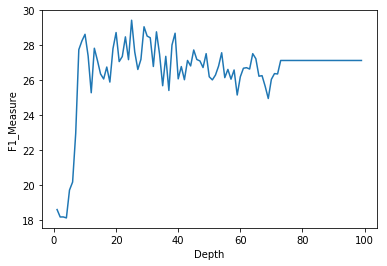

In [238]:
""" Decision Tree """
x_DT_train = yelp_TrainBinaryBag
y_DT_train = np.ravel(train_yelp_label)
x_DT_valid = yelp_ValidBinaryBag
y_DT_valid = np.ravel(valid_yelp_label)
x_DT_test = yelp_TestBinaryBag
y_DT_test = np.ravel(test_yelp_label)

""" Hyper Parameter Tuning on Validation Set """
F1_measure_DT = []
depth_list_DT= []
for depth in range(1,100,1):
    clf_decisionTree = DecisionTreeClassifier(criterion= "gini", random_state=1, max_depth=depth, min_samples_split = 2, min_samples_leaf=1)
    clf_decisionTree.fit(x_DT_train, y_DT_train)
    prediction_DT_valid = clf_decisionTree.predict(x_DT_valid)
    F1_measure_valid = f1_score(valid_yelp_label, prediction_DT_valid, average='macro')*100
    F1_measure_DT = np.append(F1_measure_DT, F1_measure_valid)
    depth_list_DT = np.append(depth_list_DT, depth)
    print("Validation F1-Measure:", F1_measure_valid, "\t\t""Depth:", depth)

best_depth = depth_list_DT [np.argmax(F1_measure_DT)]
print('\n''Best depth is', best_depth,'and F1-Measure for validation set corresponding to best depth is', max(F1_measure_DT))

""" Plotting """

a = F1_measure_DT.squeeze()
b = depth_list_DT.squeeze()
plt.plot(b , a)
plt.ylabel('F1_Measure')
plt.xlabel("Depth")
# plt.legend(loc ='upper right')
plt.show()

Validation F1-Measure: 29.4424898683 		Min_Sample_Split: 2
Validation F1-Measure: 26.7714214859 		Min_Sample_Split: 7
Validation F1-Measure: 27.3597957548 		Min_Sample_Split: 12
Validation F1-Measure: 28.7047693389 		Min_Sample_Split: 17
Validation F1-Measure: 28.4476021228 		Min_Sample_Split: 22
Validation F1-Measure: 29.3285880526 		Min_Sample_Split: 27
Validation F1-Measure: 29.4429905618 		Min_Sample_Split: 32
Validation F1-Measure: 29.2957244414 		Min_Sample_Split: 37
Validation F1-Measure: 30.2483360486 		Min_Sample_Split: 42
Validation F1-Measure: 30.6687223302 		Min_Sample_Split: 47
Validation F1-Measure: 29.7301833868 		Min_Sample_Split: 52
Validation F1-Measure: 29.983775358 		Min_Sample_Split: 57
Validation F1-Measure: 30.2332557941 		Min_Sample_Split: 62
Validation F1-Measure: 31.6222849117 		Min_Sample_Split: 67
Validation F1-Measure: 31.8776064275 		Min_Sample_Split: 72
Validation F1-Measure: 30.3065863098 		Min_Sample_Split: 77
Validation F1-Measure: 31.9277276151 		Min_

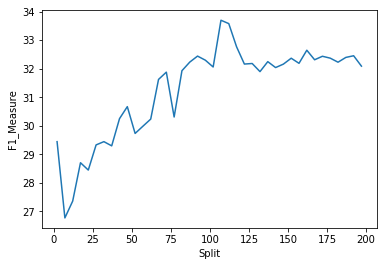

In [239]:
""" Decision Tree """
""" Tuning Min-Sample-Split """
""" Hyper Parameter Tuning on Validation Set """
F1_measure_DT = []
split_list_DT= []
for split in range(2,200,5):
    clf_decisionTree = DecisionTreeClassifier(criterion= "gini", random_state=1, min_samples_split = split, min_samples_leaf=1, max_depth = 25.0)
    clf_decisionTree.fit(x_DT_train, y_DT_train)
    prediction_DT_valid = clf_decisionTree.predict(x_DT_valid)
    F1_measure_valid = f1_score(valid_yelp_label, prediction_DT_valid, average='macro')*100
    F1_measure_DT = np.append(F1_measure_DT, F1_measure_valid)
    split_list_DT = np.append(split_list_DT, split)
    print("Validation F1-Measure:", F1_measure_valid, "\t\t""Min_Sample_Split:", split)

best_split = split_list_DT [np.argmax(F1_measure_DT)]
print('\n''Best Min_Sample_Split is', best_split,'and F1-Measure for validation set corresponding to best split is', max(F1_measure_DT))

""" Plotting """

a = F1_measure_DT.squeeze()
b = split_list_DT.squeeze()
plt.plot(b , a)
plt.ylabel('F1_Measure')
plt.xlabel("Split")
# plt.legend(loc ='upper right')
plt.show()

Validation F1-Measure: 33.6954202258 		Min_Sample_Leaf: 1
Validation F1-Measure: 31.9791238614 		Min_Sample_Leaf: 6
Validation F1-Measure: 31.4072575063 		Min_Sample_Leaf: 11
Validation F1-Measure: 29.6900362406 		Min_Sample_Leaf: 16
Validation F1-Measure: 29.3308037098 		Min_Sample_Leaf: 21
Validation F1-Measure: 29.1858245886 		Min_Sample_Leaf: 26
Validation F1-Measure: 30.0365715499 		Min_Sample_Leaf: 31
Validation F1-Measure: 29.0753161439 		Min_Sample_Leaf: 36
Validation F1-Measure: 30.3637317191 		Min_Sample_Leaf: 41
Validation F1-Measure: 28.1917462004 		Min_Sample_Leaf: 46
Validation F1-Measure: 28.7739071463 		Min_Sample_Leaf: 51
Validation F1-Measure: 28.3264687202 		Min_Sample_Leaf: 56
Validation F1-Measure: 28.7919240418 		Min_Sample_Leaf: 61
Validation F1-Measure: 27.0619695885 		Min_Sample_Leaf: 66
Validation F1-Measure: 28.0914953239 		Min_Sample_Leaf: 71
Validation F1-Measure: 26.606099784 		Min_Sample_Leaf: 76


C:\Users\niloo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation F1-Measure: 26.7021870861 		Min_Sample_Leaf: 81
Validation F1-Measure: 27.6052177828 		Min_Sample_Leaf: 86
Validation F1-Measure: 27.721677157 		Min_Sample_Leaf: 91
Validation F1-Measure: 27.0967187385 		Min_Sample_Leaf: 96

Best Min_Sample_Leaf is 1.0 and F1-Measure for validation set corresponding to best leaf is 33.6954202258


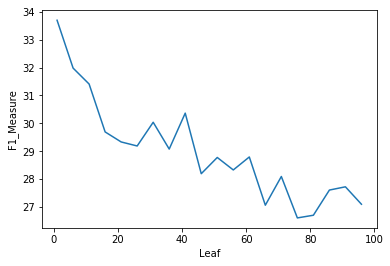

In [244]:
### """ Decision Tree """
""" Tuning Min-Sample-Leaf """
""" Hyper Parameter Tuning on Validation Set """
F1_measure_DT = []
leaf_list_DT= []
for leaf in range(1,100,5):
    clf_decisionTree = DecisionTreeClassifier(criterion= "gini", random_state=1, min_samples_split =107, min_samples_leaf= leaf, max_depth=25)
    clf_decisionTree.fit(x_DT_train, y_DT_train)
    prediction_DT_valid = clf_decisionTree.predict(x_DT_valid)
    F1_measure_valid = f1_score(valid_yelp_label, prediction_DT_valid, average='macro')*100
    F1_measure_DT = np.append(F1_measure_DT, F1_measure_valid)
    leaf_list_DT = np.append(leaf_list_DT, leaf)
    print("Validation F1-Measure:", F1_measure_valid, "\t\t""Min_Sample_Leaf:", leaf)

best_leaf = leaf_list_DT [np.argmax(F1_measure_DT)]
print('\n''Best Min_Sample_Leaf is', best_leaf,'and F1-Measure for validation set corresponding to best leaf is', max(F1_measure_DT))

""" Plotting """

a = F1_measure_DT.squeeze()
b = leaf_list_DT.squeeze()
plt.plot(b , a)
plt.ylabel('F1_Measure')
plt.xlabel("Leaf")
# plt.legend(loc ='upper right')
plt.show()

# Decision Tree

In [250]:
""" Decision Tree Classifier for Train Set """
clf_decisionTree = DecisionTreeClassifier(criterion= "gini",min_samples_split=107, min_samples_leaf=1 , random_state=1, max_depth = 25.0)
clf_decisionTree.fit(x_DT_train, y_DT_train)
prediction_DT_Train = clf_decisionTree.predict(x_DT_train)
accuracy = accuracy_score(prediction_DT_Train,y_DT_train)*100
print("Decision Tree Classifier Accuracy for Train Set:",accuracy)
F1_measure_train = f1_score(train_yelp_label, prediction_DT_Train, average='macro')*100
print("F1-Measure for Decision Tree Classifier on Train set:", F1_measure_train)


""" Decision Tree Classifier for Validation Set """
prediction_DT_Valid = clf_decisionTree.predict(x_DT_valid)
accuracy = accuracy_score(prediction_DT_Valid ,y_DT_valid)*100
print("Decision Tree Classifier Accuracy for Validation Set:",accuracy)
F1_measure_valid = f1_score(valid_yelp_label, prediction_DT_Valid, average='macro')*100
print("F1-Measure for Decision Tree Classifier on Validation set:", F1_measure_valid)

""" Decision Tree Classifier for Test Set """
prediction_DT_Test = clf_decisionTree.predict(x_DT_test)
accuracy = accuracy_score(prediction_DT_Test ,y_DT_test)*100
print("Decision Tree Classifier Accuracy for Validation Set:",accuracy)
F1_measure_test = f1_score(test_yelp_label, prediction_DT_Test, average='macro')*100
print("F1-Measure for Decision Tree Classifier on Validation set:", F1_measure_test)


Decision Tree Classifier Accuracy for Train Set: 56.8571428571
F1-Measure for Decision Tree Classifier on Train set: 47.6702034246
Decision Tree Classifier Accuracy for Validation Set: 39.4
F1-Measure for Decision Tree Classifier on Validation set: 33.6954202258
Decision Tree Classifier Accuracy for Validation Set: 38.75
F1-Measure for Decision Tree Classifier on Validation set: 28.9745855079


Confusion matrix, without normalization
[[ 31  15  14  51  32]
 [ 31  14  32  64  49]
 [  9  23  41 148  79]
 [ 13  25  52 355 257]
 [ 15   9  31 276 334]]
Normalized confusion matrix
[[ 0.22  0.1   0.1   0.36  0.22]
 [ 0.16  0.07  0.17  0.34  0.26]
 [ 0.03  0.08  0.14  0.49  0.26]
 [ 0.02  0.04  0.07  0.51  0.37]
 [ 0.02  0.01  0.05  0.42  0.5 ]]


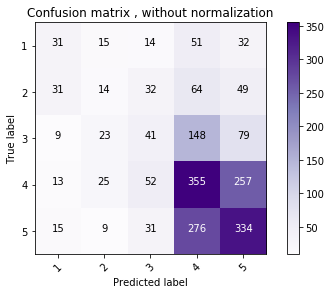

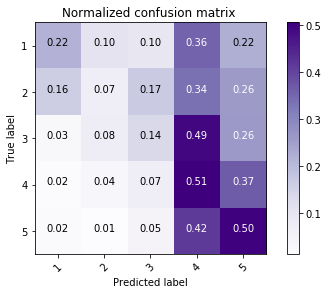

In [251]:
class_names = ['1', '2','3','4','5']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Purples):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_yelp_label, prediction_DT_Test)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix , without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix ')

plt.show()

In [269]:
parameters = {"max_depth":range(1,100,10) ,"min_samples_split":range(2,200,20), "min_samples_leaf":range(1,200,20)}
DT=GridSearchCV(DecisionTreeClassifier(), parameters).fit(x_DT_train, y_DT_train)
prediction_valid = DT.predict(x_DT_valid)
F1_measure_valid = f1_score(valid_yelp_label, prediction_valid, average='macro')*100
print("F1-Measure for SVM Classifier on Validation set:", F1_measure_valid)
print("Model best score:", DT.best_score_ )
print("Model best parameter:", DT.best_params_ )

F1-Measure for SVM Classifier on Validation set: 28.2094366655
Model best score: 0.420428571429
Model best parameter: {'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 182}


C:\Users\niloo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#  Frequency Bag-of-word 

In [139]:
yelp_TrainFrequencyBag = np.zeros([7000,10000])

for i in range(len(train_yelp_par)):
    for sentence in train_yelp_par[i]:
        word = sentence.split()
        for j in range(len(yelp_Feature)):
            if yelp_TrainBinaryBag [i][j] == 1:
                yelp_TrainFrequencyBag [i][j] = word.count(yelp_Feature[j]) 
        row_sum = np.sum(yelp_TrainFrequencyBag [i][:])   
        if row_sum != 0:
            for j in range(len(yelp_TrainFrequencyBag[0])):
                yelp_TrainFrequencyBag [i][j] = np.divide(yelp_TrainFrequencyBag [i][j],row_sum)

In [140]:
yelp_ValidFrequencyBag = np.zeros([1000,10000])

for i in range(len(valid_yelp_par)):
    for sentence in valid_yelp_par[i]:
        word = sentence.split()
        for j in range(len(yelp_Feature)):
            if yelp_ValidBinaryBag [i][j] == 1:
                yelp_ValidFrequencyBag [i][j] = word.count(yelp_Feature[j]) 
        row_sum = np.sum(yelp_ValidFrequencyBag [i][:])   
        for j in range(len(yelp_ValidFrequencyBag[0])):
            yelp_ValidFrequencyBag [i][j] = yelp_ValidFrequencyBag [i][j]/row_sum

In [141]:
yelp_TestFrequencyBag = np.zeros([2000,10000])

for i in range(len(test_yelp_par)):
    for sentence in test_yelp_par[i]:
        word = sentence.split()
        for j in range(len(yelp_Feature)):
            if yelp_TestBinaryBag [i][j] == 1:
                yelp_TestFrequencyBag [i][j] = word.count(yelp_Feature[j]) 
        row_sum = np.sum(yelp_TestFrequencyBag [i][:])   
        for j in range(len(yelp_TestFrequencyBag[0])):
            yelp_TestFrequencyBag [i][j] =  yelp_TestFrequencyBag [i][j]/row_sum

# Naive Bayse Classifier 

In [213]:
""" Training Naive Bayse Classifier """
x_NB_train_F = yelp_TrainFrequencyBag
y_NB_train_F = np.ravel(train_yelp_label)
x_NB_valid_F = yelp_ValidFrequencyBag
y_NB_valid_F = np.ravel(valid_yelp_label)
x_NB_test_F = yelp_TestFrequencyBag
y_NB_test_F = np.ravel(test_yelp_label)

""" Naive Bayes for Training Set """
gnb = GaussianNB()
gnb.fit(x_NB_train_F,y_NB_train_F)
result_train_F= gnb.predict(x_NB_train_F)

accuracy_train_F = accuracy_score(result_train_F,y_NB_train_F)*100
print("Naive Bayse Classifier Accuracy for Train Set:",accuracy_train_F)
F1_measure_train_F = f1_score(train_yelp_label ,result_train_F ,average='macro')*100
print("F1-Measure for NB Classifier on Train Set:", F1_measure_train_F)


""" Naive Bayes for Validation Set """
result_valid_F= mnb.predict(x_NB_valid_F)

accuracy_valid_F = accuracy_score(result_valid_F,y_NB_valid_F)*100
print("Naive Bayse Classifier Accuracy for Validation Set:",accuracy_valid_F)
F1_measure_valid_F = f1_score(valid_yelp_label, result_valid_F, average='macro')*100
print("F1-Measure for NB Classifier on Validation Set:", F1_measure_valid_F)


""" Naive Bayes for Test Set """
result_test_F= mnb.predict(x_NB_test_F)

accuracy_test_F = accuracy_score(result_test_F,y_NB_test_F)*100
print("Naive Bayse Classifier Accuracy for Test Set:",accuracy_test)
F1_measure_test_F = f1_score(test_yelp_label, result_test_F, average='macro')*100
print("F1-Measure for NB Classifier on Test set:", F1_measure_test_F)


Naive Bayse Classifier Accuracy for Train Set: 79.2142857143
F1-Measure for NB Classifier on Train Set: 77.5303686366
Naive Bayse Classifier Accuracy for Validation Set: 43.1
F1-Measure for NB Classifier on Validation Set: 39.6208391848
Naive Bayse Classifier Accuracy for Test Set: 43.8
F1-Measure for NB Classifier on Test set: 38.1927412339


Confusion matrix, without normalization
[[ 51  28  18   9  37]
 [ 22  44  43  30  51]
 [  8  36  61  93 102]
 [  8  25  53 307 309]
 [  8  14  28 202 413]]
Normalized confusion matrix
[[ 0.36  0.2   0.13  0.06  0.26]
 [ 0.12  0.23  0.23  0.16  0.27]
 [ 0.03  0.12  0.2   0.31  0.34]
 [ 0.01  0.04  0.08  0.44  0.44]
 [ 0.01  0.02  0.04  0.3   0.62]]


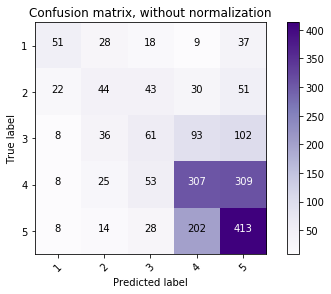

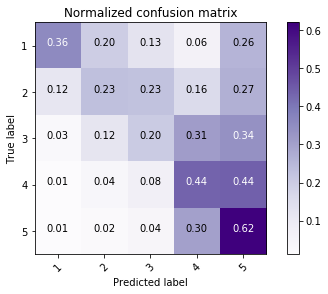

In [255]:
class_names = ['1', '2','3','4','5']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Purples):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_yelp_label, result_test_F)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# Support Vector Machine Hyperparameter Tuning

C:\Users\niloo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


 Validation F1-Measure: 15.2030792788 		C: 0.01
 Validation F1-Measure: 16.2965689854 		C: 0.0126485521686
 Validation F1-Measure: 17.2600492207 		C: 0.0159985871961
 Validation F1-Measure: 18.096873084 		C: 0.0202358964773
 Validation F1-Measure: 18.5399541338 		C: 0.025595479227
 Validation F1-Measure: 18.9849755887 		C: 0.0323745754282
 Validation F1-Measure: 19.1731511732 		C: 0.0409491506238
 Validation F1-Measure: 19.3101851852 		C: 0.0517947467923
 Validation F1-Measure: 19.3055861364 		C: 0.065512855686
 Validation F1-Measure: 19.5920667117 		C: 0.0828642772855
 Validation F1-Measure: 19.7356577997 		C: 0.104811313415
 Validation F1-Measure: 20.0959676121 		C: 0.132571136559
 Validation F1-Measure: 20.1217131492 		C: 0.167683293681
 Validation F1-Measure: 20.4872788031 		C: 0.212095088792
 Validation F1-Measure: 20.4713620503 		C: 0.268269579528
 Validation F1-Measure: 20.5481130931 		C: 0.33932217719
 Validation F1-Measure: 20.7102371917 		C: 0.429193426013
 Validation F1-Meas

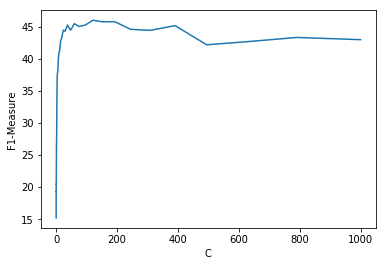

In [144]:
""" Support Vector Machine """
x_SVM_train_F = yelp_TrainFrequencyBag
y_SVM_train_F = np.ravel(train_yelp_label)
x_SVM_valid_F = yelp_ValidFrequencyBag
y_SVM_valid_F = np.ravel(valid_yelp_label)
x_SVM_test_F = yelp_TestFrequencyBag
y_SVM_test_F = np.ravel(test_yelp_label)

""" Hyper Parameter Tuning on Validation Set """
F1_measure_SVM_F = []
c_list_SVM_F = []
for c in np.logspace(-2, 3, 50):
    clf_SVM_F = LinearSVC(penalty='l2', loss='squared_hinge',C= c )
    clf_SVM_F.fit(x_SVM_train_F, y_SVM_train_F)
    prediction_valid_F = clf_SVM_F.predict(x_SVM_valid_F)
    F1_measure_valid_F = f1_score(valid_yelp_label, prediction_valid_F, average='macro')*100
    F1_measure_SVM_F = np.append(F1_measure_SVM_F, F1_measure_valid_F)
    c_list_SVM_F = np.append(c_list_SVM_F, c)
    print(" Validation F1-Measure:", F1_measure_valid_F,"\t\t" "C:", c)
    
best_c = c_list_SVM_F [np.argmax(F1_measure_SVM_F)]
print('\n''Best Penalty Parameter is', best_c,'and F1-Measure for validation set corresponding to best penalty is', max(F1_measure_SVM_F))

    
""" Plotting """

a = F1_measure_SVM_F.squeeze()
b = c_list_SVM_F.squeeze()
plt.plot(b , a)
plt.xlabel('C')
plt.ylabel('F1-Measure')
# plt.legend(loc ='lower right')
plt.show()

# Support Vector Machine Classifier

In [278]:
""" SVM Classifier for Train Set """
clf_SVM_F = LinearSVC(penalty='l2', loss='squared_hinge', C= 120.0)
clf_SVM_F.fit(x_SVM_train_F, y_SVM_train_F)
prediction_train_F = clf_SVM_F.predict(x_SVM_train_F)
accuracy_F = accuracy_score(prediction_train_F,y_SVM_train_F)*100
print("SVM Classifier Accuracy for Train Set:",accuracy_F)
F1_measure_train_F = f1_score(train_yelp_label, prediction_train_F, average='macro')*100
print("F1-Measure for SVM Classifier on Train set:", F1_measure_train_F)

""" SVM Classifier for Validation Set """
prediction_valid_F = clf_SVM_F.predict(x_SVM_valid_F)
accuracy_F = accuracy_score(prediction_valid_F,y_SVM_valid_F)*100
print("SVM Classifier Accuracy for Validation Set:",accuracy_F)
F1_measure_valid_F = f1_score(valid_yelp_label, prediction_valid_F, average='macro')*100
print("F1-Measure for SVM Classifier on Validation set:", F1_measure_valid_F)

""" SVM Classifier for Test Set """
prediction_test_F = clf_SVM_F.predict(x_SVM_test_F)
accuracy_F = accuracy_score(prediction_test_F,y_SVM_test_F)*100
print("SVM Classifier Accuracy for Test Set:",accuracy_F)
F1_measure_test_F = f1_score(test_yelp_label, prediction_test_F, average='macro')*100
print("F1-Measure for SVM Classifier on Test set:", F1_measure_test_F)

SVM Classifier Accuracy for Train Set: 89.0857142857
F1-Measure for SVM Classifier on Train set: 90.0829380874
SVM Classifier Accuracy for Validation Set: 48.4
F1-Measure for SVM Classifier on Validation set: 45.6742439426
SVM Classifier Accuracy for Test Set: 50.0
F1-Measure for SVM Classifier on Test set: 44.8442897873


Confusion matrix, without normalization
[[  6   2   1  66  68]
 [  0   2   9 145  34]
 [  1   1  14 232  52]
 [  1   1   4 483 213]
 [  0   0   1 244 420]]
Normalized confusion matrix
[[ 0.04  0.01  0.01  0.46  0.48]
 [ 0.    0.01  0.05  0.76  0.18]
 [ 0.    0.    0.05  0.77  0.17]
 [ 0.    0.    0.01  0.69  0.3 ]
 [ 0.    0.    0.    0.37  0.63]]


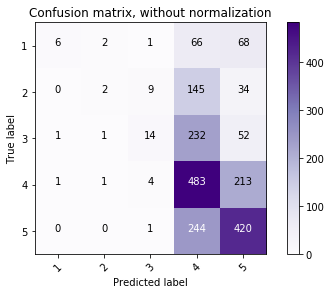

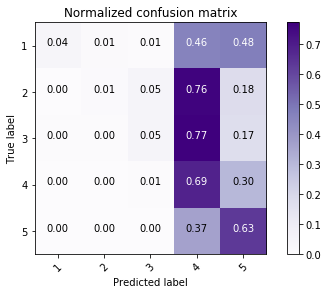

In [268]:
class_names = ['1', '2','3','4','5']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Purples):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_yelp_label, prediction_test_F)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# Decision Tree Hyperparameter Tuning

C:\Users\niloo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation F1-Measure: 18.61843344 		Depth: 1
Validation F1-Measure: 18.6165206848 		Depth: 2
Validation F1-Measure: 18.5688604581 		Depth: 3
Validation F1-Measure: 18.9613568806 		Depth: 4
Validation F1-Measure: 21.6003425646 		Depth: 5
Validation F1-Measure: 21.6164177023 		Depth: 6
Validation F1-Measure: 24.9874887027 		Depth: 7
Validation F1-Measure: 24.9728171895 		Depth: 8
Validation F1-Measure: 29.9939396903 		Depth: 9
Validation F1-Measure: 29.0105962569 		Depth: 10
Validation F1-Measure: 28.8411601891 		Depth: 11
Validation F1-Measure: 28.9269864508 		Depth: 12
Validation F1-Measure: 29.3880853296 		Depth: 13
Validation F1-Measure: 29.2242966392 		Depth: 14
Validation F1-Measure: 29.5369911489 		Depth: 15
Validation F1-Measure: 29.6110909536 		Depth: 16
Validation F1-Measure: 29.0892716481 		Depth: 17
Validation F1-Measure: 30.027902023 		Depth: 18
Validation F1-Measure: 29.2619300842 		Depth: 19
Validation F1-Measure: 29.2128729694 		Depth: 20
Validation F1-Measure: 28.482488

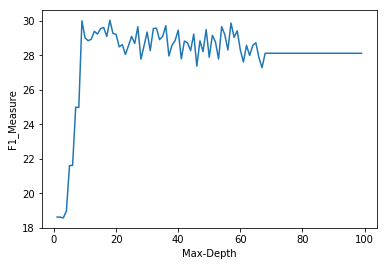

In [147]:
""" Decision Tree """
x_DT_train_F = yelp_TrainFrequencyBag
y_DT_train_F = np.ravel(train_yelp_label)
x_DT_valid_F = yelp_ValidFrequencyBag
y_DT_valid_F = np.ravel(valid_yelp_label)
x_DT_test_F = yelp_TestFrequencyBag
y_DT_test_F = np.ravel(test_yelp_label)
""" Hyper Parameter Tuning on Validation Set """
F1_measure_DT_F = []
depth_list_DT_F= []
for depth in range(1,100,1):
    clf_decisionTree_F = DecisionTreeClassifier(criterion= "gini", random_state=1, max_depth=depth)
    clf_decisionTree_F.fit(x_DT_train_F, y_DT_train_F)
    prediction_DT_valid_F = clf_decisionTree_F.predict(x_DT_valid_F)
    F1_measure_valid_F = f1_score(valid_yelp_label, prediction_DT_valid_F, average='macro')*100
    F1_measure_DT_F = np.append(F1_measure_DT_F, F1_measure_valid_F)
    depth_list_DT_F = np.append(depth_list_DT_F, depth)
    print("Validation F1-Measure:", F1_measure_valid_F, "\t\t""Depth:", depth)

best_depth = depth_list_DT_F [np.argmax(F1_measure_DT_F)]
print('\n''Best depth is', best_depth,'and F1-Measure for validation set corresponding to best depth is', max(F1_measure_DT_F))


""" Plotting """

a = F1_measure_DT_F.squeeze()
b = depth_list_DT_F.squeeze()
plt.plot(b , a)
plt.ylabel('F1_Measure')
plt.xlabel("Max-Depth")
plt.legend(loc ='upper right')
plt.show()

Validation F1-Measure: 30.027902023 		Min_Sample_Split: 2
Validation F1-Measure: 29.7639679615 		Min_Sample_Split: 7
Validation F1-Measure: 29.9527672228 		Min_Sample_Split: 12
Validation F1-Measure: 29.7650984583 		Min_Sample_Split: 17
Validation F1-Measure: 30.6042067854 		Min_Sample_Split: 22
Validation F1-Measure: 30.8295220114 		Min_Sample_Split: 27
Validation F1-Measure: 30.3855297901 		Min_Sample_Split: 32
Validation F1-Measure: 30.4755628854 		Min_Sample_Split: 37
Validation F1-Measure: 29.668930055 		Min_Sample_Split: 42
Validation F1-Measure: 29.2170053095 		Min_Sample_Split: 47
Validation F1-Measure: 29.8698039737 		Min_Sample_Split: 52
Validation F1-Measure: 30.5366846471 		Min_Sample_Split: 57
Validation F1-Measure: 30.432329645 		Min_Sample_Split: 62
Validation F1-Measure: 30.4716757178 		Min_Sample_Split: 67
Validation F1-Measure: 29.3410433481 		Min_Sample_Split: 72
Validation F1-Measure: 29.7371400878 		Min_Sample_Split: 77
Validation F1-Measure: 30.4927986957 		Min_Sa

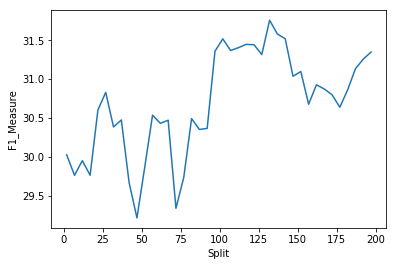

In [274]:
""" Decision Tree """
""" Tuning Min-Sample-Split """
""" Hyper Parameter Tuning on Validation Set """
F1_measure_DT_F = []
split_list_DT_F= []
for split in range(2,200,5):
    clf_decisionTree_F = DecisionTreeClassifier(criterion= "gini", random_state=1, min_samples_split = split, min_samples_leaf=1, max_depth = 18.0)
    clf_decisionTree_F.fit(x_DT_train_F, y_DT_train_F)
    prediction_DT_valid_F = clf_decisionTree_F.predict(x_DT_valid_F)
    F1_measure_valid_F = f1_score(valid_yelp_label, prediction_DT_valid_F, average='macro')*100
    F1_measure_DT_F = np.append(F1_measure_DT_F, F1_measure_valid_F)
    split_list_DT_F= np.append(split_list_DT_F, split)
    print("Validation F1-Measure:", F1_measure_valid_F, "\t\t""Min_Sample_Split:", split)

best_split_F = split_list_DT_F [np.argmax(F1_measure_DT_F)]
print('\n''Best Min_Sample_Split is', best_split_F,'and F1-Measure for validation set corresponding to best split is', max(F1_measure_DT_F))

""" Plotting """

a = F1_measure_DT_F.squeeze()
b = split_list_DT_F.squeeze()
plt.plot(b , a)
plt.ylabel('F1_Measure')
plt.xlabel("Split")
# plt.legend(loc ='upper right')
plt.show()

Validation F1-Measure: 31.7564800961 		Min_Sample_Leaf: 1
Validation F1-Measure: 31.4135790986 		Min_Sample_Leaf: 6
Validation F1-Measure: 30.5785231348 		Min_Sample_Leaf: 11
Validation F1-Measure: 30.7861142238 		Min_Sample_Leaf: 16
Validation F1-Measure: 28.7156000465 		Min_Sample_Leaf: 21
Validation F1-Measure: 31.0161621696 		Min_Sample_Leaf: 26
Validation F1-Measure: 29.1734387789 		Min_Sample_Leaf: 31
Validation F1-Measure: 28.9787190753 		Min_Sample_Leaf: 36
Validation F1-Measure: 29.268075293 		Min_Sample_Leaf: 41
Validation F1-Measure: 28.1913868977 		Min_Sample_Leaf: 46
Validation F1-Measure: 29.2811499416 		Min_Sample_Leaf: 51
Validation F1-Measure: 29.9067680188 		Min_Sample_Leaf: 56
Validation F1-Measure: 30.0189461309 		Min_Sample_Leaf: 61
Validation F1-Measure: 29.6420147913 		Min_Sample_Leaf: 66
Validation F1-Measure: 29.4484693752 		Min_Sample_Leaf: 71
Validation F1-Measure: 29.1087967758 		Min_Sample_Leaf: 76
Validation F1-Measure: 29.6868567602 		Min_Sample_Leaf: 81


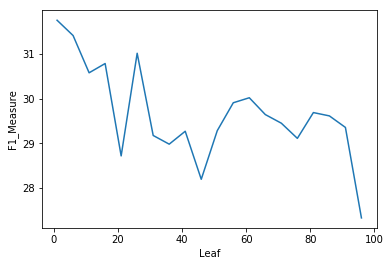

In [275]:
""" Decision Tree """
""" Tuning Min-Sample-Leaf """
""" Hyper Parameter Tuning on Validation Set """
F1_measure_DT_F = []
leaf_list_DT_F= []
for leaf in range(1,100,5):
    clf_decisionTree_F = DecisionTreeClassifier(criterion= "gini", random_state=1, min_samples_split = 132 , min_samples_leaf= leaf, max_depth=18.0)
    clf_decisionTree_F.fit(x_DT_train_F, y_DT_train_F)
    prediction_DT_valid_F = clf_decisionTree_F.predict(x_DT_valid_F)
    F1_measure_valid_F = f1_score(valid_yelp_label, prediction_DT_valid_F, average='macro')*100
    F1_measure_DT_F = np.append(F1_measure_DT_F, F1_measure_valid_F)
    leaf_list_DT_F = np.append(leaf_list_DT_F, leaf)
    print("Validation F1-Measure:", F1_measure_valid_F, "\t\t""Min_Sample_Leaf:", leaf)

best_leaf_F = leaf_list_DT_F [np.argmax(F1_measure_DT_F)]
print('\n''Best Min_Sample_Leaf is', best_leaf_F,'and F1-Measure for validation set corresponding to best leaf is', max(F1_measure_DT_F))

""" Plotting """

a = F1_measure_DT_F.squeeze()
b = leaf_list_DT_F.squeeze()
plt.plot(b , a)
plt.ylabel('F1_Measure')
plt.xlabel("Leaf")
# plt.legend(loc ='upper right')
plt.show()

# Decision Tree Classifier

In [276]:
""" Decision Tree Classifier for Train Set """
clf_decisionTree_F = DecisionTreeClassifier(criterion= "gini", random_state=1, max_depth = 18, min_samples_split = 132 , min_samples_leaf=1)
clf_decisionTree_F.fit(x_DT_train_F, y_DT_train_F)
prediction_DT_Train_F = clf_decisionTree_F.predict(x_DT_train_F)
accuracy_F = accuracy_score(prediction_DT_Train_F,y_DT_train_F)*100
print("Decision Tree Classifier Accuracy for Train Set:",accuracy_F)
F1_measure_train_F = f1_score(train_yelp_label, prediction_DT_Train_F, average='macro')*100
print("F1-Measure for Decision Tree Classifier on Train set:", F1_measure_train_F)


""" Decision Tree Classifier for Validation Set """
prediction_DT_Valid_F = clf_decisionTree_F.predict(x_DT_valid)
accuracy_F = accuracy_score(prediction_DT_Valid_F ,y_DT_valid_F)*100
print("Decision Tree Classifier Accuracy for Validation Set:",accuracy_F)
F1_measure_valid_F = f1_score(valid_yelp_label, prediction_DT_Valid_F, average='macro')*100
print("F1-Measure for Decision Tree Classifier on Validation set:", F1_measure_valid_F)

""" Decision Tree Classifier for Test Set """
prediction_DT_Test_F = clf_decisionTree_F.predict(x_DT_test)
accuracy = accuracy_score(prediction_DT_Test_F ,y_DT_test_F)*100
print("Decision Tree Classifier Accuracy for Validation Set:",accuracy)
F1_measure_test_F = f1_score(test_yelp_label, prediction_DT_Test_F, average='macro')*100
print("F1-Measure for Decision Tree Classifier on Validation set:", F1_measure_test_F)


Decision Tree Classifier Accuracy for Train Set: 57.4571428571
F1-Measure for Decision Tree Classifier on Train set: 47.5803376327
Decision Tree Classifier Accuracy for Validation Set: 34.8
F1-Measure for Decision Tree Classifier on Validation set: 25.7494941898
Decision Tree Classifier Accuracy for Validation Set: 36.6
F1-Measure for Decision Tree Classifier on Validation set: 26.0710334246


Confusion matrix, without normalization
[[ 21   5  13  74  30]
 [ 17  12  29  98  34]
 [  7  13  31 166  83]
 [ 15   9  66 365 247]
 [  5   7  45 305 303]]
Normalized confusion matrix
[[ 0.15  0.03  0.09  0.52  0.21]
 [ 0.09  0.06  0.15  0.52  0.18]
 [ 0.02  0.04  0.1   0.55  0.28]
 [ 0.02  0.01  0.09  0.52  0.35]
 [ 0.01  0.01  0.07  0.46  0.46]]


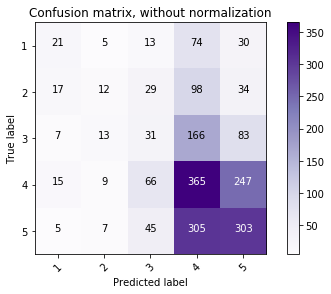

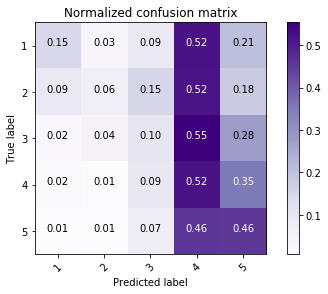

In [277]:
class_names = ['1', '2','3','4','5']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Purples):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_yelp_label, prediction_DT_Test_F)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [272]:
# parameters = {"max_depth":range(1,100,10) ,"min_samples_split":range(2,200,20), "min_samples_leaf":range(1,200,20)}
# DT_F=GridSearchCV(DecisionTreeClassifier(), parameters).fit(x_DT_train_F, y_DT_train_F)
# prediction_valid_F = DT_F.predict(x_DT_valid_F)
# F1_measure_valid_F = f1_score(valid_yelp_label, prediction_valid_F, average='macro')*100
# print("F1-Measure for SVM Classifier on Validation set:", F1_measure_valid_F)
# print("Model best score:", DT_F.best_score_ )
# print("Model best parameter:", DT_F.best_params_ )